In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input/playground-series-s5e7")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "sample_submission.csv" "test.csv"              "train.csv"

In [2]:
data <- read.csv("../input/playground-series-s5e7/train.csv")
head(data)
test_data <- read.csv("../input/playground-series-s5e7/test.csv")
head(test_data)
sample_submissions <- read.csv("../input/playground-series-s5e7/sample_submission.csv")
head(sample_submissions)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
,<int>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,0,0,No,6,4,No,15,5,Extrovert
2,1,1,No,7,3,No,10,8,Extrovert
3,2,6,Yes,1,0,,3,0,Introvert
4,3,3,No,7,3,No,11,5,Extrovert
5,4,1,No,4,4,No,13,NA,Extrovert
6,5,2,No,8,5,No,NA,3,Extrovert


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
,<int>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,18524,3,No,7,4,No,6,NA
2,18525,NA,Yes,0,0,Yes,5,1
3,18526,3,No,5,6,No,15,9
4,18527,3,No,4,4,No,5,6
5,18528,9,Yes,1,2,Yes,1,1
6,18529,2,No,5,3,No,10,4


,id,Personality
,<int>,<chr>
1,18524,Extrovert
2,18525,Extrovert
3,18526,Extrovert
4,18527,Extrovert
5,18528,Extrovert
6,18529,Extrovert


## Data exploration 

In [3]:
str(data)
colSums(is.na(data))

'data.frame':	18524 obs. of  9 variables:
 $ id                       : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Time_spent_Alone         : num  0 1 6 3 1 2 1 2 4 1 ...
 $ Stage_fear               : chr  "No" "No" "Yes" "No" ...
 $ Social_event_attendance  : num  6 7 1 7 4 8 8 8 2 8 ...
 $ Going_outside            : num  4 3 0 3 4 5 NA 3 1 6 ...
 $ Drained_after_socializing: chr  "No" "No" "" "No" ...
 $ Friends_circle_size      : num  15 10 3 11 13 NA NA 4 0 14 ...
 $ Post_frequency           : num  5 8 0 5 NA 3 4 5 2 9 ...
 $ Personality              : chr  "Extrovert" "Extrovert" "Introvert" "Extrovert" ...


id          Time_spent_Alone                Stage_fear 
                        0                      1190                         0 
  Social_event_attendance             Going_outside Drained_after_socializing 
                     1180                      1466                         0 
      Friends_circle_size            Post_frequency               Personality 
                     1054                      1264                         0

#### Remove the records with missing values 
#### Convert columns Stage_fear, Drained_after_socializing, and Personality into categorical columns

In [4]:
data <- na.omit(data)
rows <- nrow(data)
rows
cols <- ncol(data)
cols
data$Stage_fear <- as.factor(data$Stage_fear)
data$Drained_after_socializing <- as.factor(data$Drained_after_socializing)
data$Personality <- as.factor(data$Personality)
str(data)

[1] 12831

[1] 9

'data.frame':	12831 obs. of  9 variables:
 $ id                       : int  0 1 2 3 7 8 9 10 11 12 ...
 $ Time_spent_Alone         : num  0 1 6 3 2 4 1 3 2 3 ...
 $ Stage_fear               : Factor w/ 3 levels "","No","Yes": 2 2 3 2 2 3 2 2 2 2 ...
 $ Social_event_attendance  : num  6 7 1 7 8 2 8 7 6 5 ...
 $ Going_outside            : num  4 3 0 3 3 1 6 4 3 4 ...
 $ Drained_after_socializing: Factor w/ 3 levels "","No","Yes": 2 2 1 2 2 1 2 2 2 2 ...
 $ Friends_circle_size      : num  15 10 3 11 4 0 14 5 4 9 ...
 $ Post_frequency           : num  5 8 0 5 5 2 9 10 8 6 ...
 $ Personality              : Factor w/ 2 levels "Extrovert","Introvert": 1 1 2 1 1 2 1 1 1 1 ...
 - attr(*, "na.action")= 'omit' Named int [1:5693] 5 6 7 14 15 16 20 29 30 32 ...
  ..- attr(*, "names")= chr [1:5693] "5" "6" "7" "14" ...


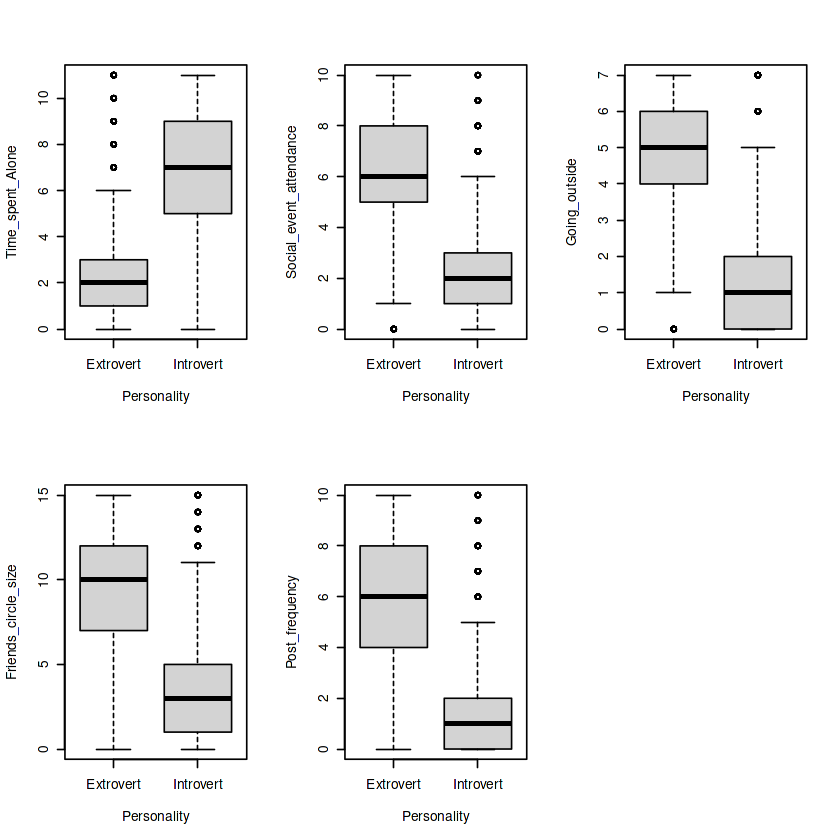

In [5]:
par(mfrow = c(2, 3))
plot(Time_spent_Alone ~ Personality, data = data)
plot(Social_event_attendance ~ Personality, data = data)
plot(Going_outside ~ Personality, data = data)
plot(Friends_circle_size ~ Personality, data = data)
plot(Post_frequency ~ Personality, data = data)


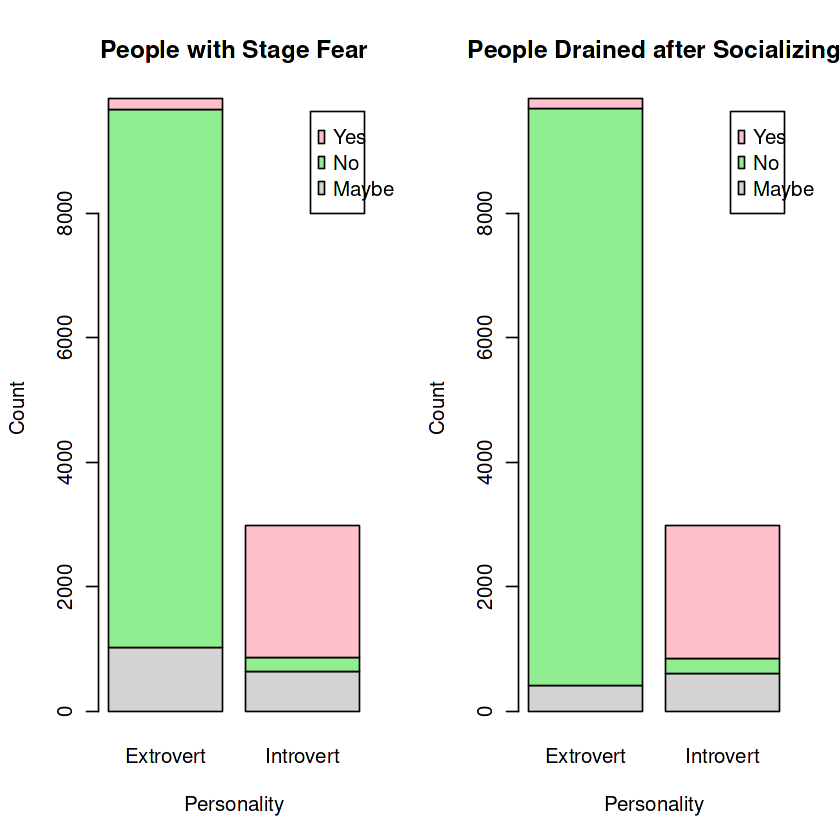

In [6]:
par(mfrow = c(1, 2))
barplot(table(data$Stage_fear, data$Personality), 
        main = "People with Stage Fear", 
        xlab = "Personality", 
        ylab = "Count",
        col = c("lightgray", "lightgreen", "pink"),
        legend.text = c("Maybe", "No", "Yes")
)
barplot(table(data$Drained_after_socializing, data$Personality), 
        main = "People Drained after Socializing", 
        xlab = "Personality", 
        ylab = "Count",
        col = c("lightgray", "lightgreen", "pink"),
        legend.text = c("Maybe", "No", "Yes")
)

In [7]:
data %>% group_by(Personality, Stage_fear) %>% summarise(Count = n()) 

`summarise()` has grouped output by 'Personality'. You can override using the
`.groups` argument.


Personality,Stage_fear,Count
<fct>,<fct>,<int>
Extrovert,,1028
Extrovert,No,8645
Extrovert,Yes,172
Introvert,,638
Introvert,No,227
Introvert,Yes,2121


In [8]:
data %>% group_by(Personality, Drained_after_socializing) %>% summarise(Count = n()) 

`summarise()` has grouped output by 'Personality'. You can override using the
`.groups` argument.


Personality,Drained_after_socializing,Count
<fct>,<fct>,<int>
Extrovert,,410
Extrovert,No,9265
Extrovert,Yes,170
Introvert,,602
Introvert,No,243
Introvert,Yes,2141


In [9]:
data %>% group_by(Personality) %>% summarise(Count = n())

Personality,Count
<fct>,<int>
Extrovert,9845
Introvert,2986


## Splitting data into training data and testing data

In [10]:
set.seed(1234)
rows = dim(data)[1]
indices <- 1:rows
training_indices <- sample(indices, 0.8*rows, replace = F)

training_data <- data[training_indices, ]
testing_data <- data[-training_indices, ]

In [11]:
dim(training_data)

[1] 10264     9

In [12]:
glm.fit <- glm(Personality ~ . - id, data = training_data, family = "binomial")
summary(glm.fit)


Call:
glm(formula = Personality ~ . - id, family = "binomial", data = training_data)

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   1.30271    0.27927   4.665 3.09e-06 ***
Time_spent_Alone              0.22524    0.02496   9.023  < 2e-16 ***
Stage_fearNo                 -0.94208    0.16278  -5.787 7.15e-09 ***
Stage_fearYes                 0.23173    0.17469   1.326   0.1847    
Social_event_attendance      -0.16384    0.02922  -5.608 2.05e-08 ***
Going_outside                -0.06742    0.03858  -1.748   0.0805 .  
Drained_after_socializingNo  -1.61198    0.18290  -8.814  < 2e-16 ***
Drained_after_socializingYes  0.40487    0.16904   2.395   0.0166 *  
Friends_circle_size          -0.07777    0.01796  -4.330 1.49e-05 ***
Post_frequency               -0.15131    0.02821  -5.364 8.16e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

   

In [13]:
probabilities <- predict(glm.fit, testing_data[, -9], type = "response")
predicted <- rep(0, nrow(testing_data))
predicted[probabilities > 0.5] <- 1

predicted <- as.matrix(predicted, ncols = 1)
predicted[predicted == 0] <- "Extrovert"
predicted[predicted == 1] <- "Introvert"
colnames(predicted) <- c("Personality")

table(testing_data$Personality, predicted)
mean(testing_data$Personality != predicted)

           predicted
            Extrovert Introvert
  Extrovert      1962        33
  Introvert        45       527

[1] 0.03038566

## Linear Discriminant Analysis (LDA)

In [14]:
library(MASS)
set.seed(1234)
lda.mod <- lda(Personality ~ . - id, data = training_data)
summary(lda.mod)

pred.lda.test <- predict(lda.mod, testing_data[,-9])

table(testing_data$Personality, pred.lda.test$class)
mean(testing_data$Personality != pred.lda.test$class)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




        Length Class  Mode     
prior    2     -none- numeric  
counts   2     -none- numeric  
means   18     -none- numeric  
scaling  9     -none- numeric  
lev      2     -none- character
svd      1     -none- numeric  
N        1     -none- numeric  
call     3     -none- call     
terms    3     terms  call     
xlevels  2     -none- list     

           
            Extrovert Introvert
  Extrovert      1962        33
  Introvert        45       527

[1] 0.03038566

## Quadratic Discriminant Analysis (QDA)

In [15]:
set.seed(1234)
qda.mod <- qda(Personality ~ . - id, data = training_data)
summary(qda.mod)

pred.qda.test <- predict(qda.mod, testing_data[,-9])

table(testing_data$Personality, pred.qda.test$class)
mean(testing_data$Personality != pred.qda.test$class)

        Length Class  Mode     
prior     2    -none- numeric  
counts    2    -none- numeric  
means    18    -none- numeric  
scaling 162    -none- numeric  
ldet      2    -none- numeric  
lev       2    -none- character
N         1    -none- numeric  
call      3    -none- call     
terms     3    terms  call     
xlevels   2    -none- list     

           
            Extrovert Introvert
  Extrovert      1959        36
  Introvert        44       528

[1] 0.03116478

## K-Nearest Neighbors (KNN)

In [16]:
training_data$Stage_fear <- as.numeric(training_data$Stage_fear)
training_data$Drained_after_socializing <- as.numeric(training_data$Drained_after_socializing)
training_data$Personality <- as.numeric(training_data$Personality)
testing_data$Stage_fear <- as.numeric(testing_data$Stage_fear)
testing_data$Drained_after_socializing <- as.numeric(testing_data$Drained_after_socializing)
testing_data$Personality <- as.numeric(testing_data$Personality)

In [17]:
library(class)
knn.mod <- knn(training_data[, -9], testing_data[, -9], training_data$Personality, k = 3)
summary(knn.mod)
table(testing_data$Personality, knn.mod)
mean(testing_data$Personality != knn.mod)

1    2 
2150  417

   knn.mod
       1    2
  1 1961   34
  2  189  383

[1] 0.08687183

## Submissions

In [18]:
probabilities <- predict(glm.fit, test_data, type = "response")
predicted <- rep(0, nrow(test_data))
predicted[probabilities > 0.5] <- 1

In [21]:
predicted <- as.matrix(predicted, ncols = 1)
predicted[predicted == 0] <- "Extrovert"
predicted[predicted == 1] <- "Introvert"
colnames(predicted) <- c("Personality")

In [22]:
submissions <- cbind(id = test_data$id, Personality = predicted)
write.csv(submissions, "submissions.csv", row.names = FALSE)
